In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%autosave 60

Autosaving every 60 seconds


# DSCI 235 Final Project
### By: Blake Davis and Elisabeth Ball

Data Source 1: https://www.kaggle.com/datasets/aliaamiri/2020-summer-olympics-dataset?select=2020_Olympics_Dataset.csv <br>
Data Source 2: https://www.kaggle.com/datasets/rio2016/olympic-games <br>
GitHub: https://github.com/bdavis12302/2020-2016-Summer-Olympic-Data <br>

## Project Description

For this project, we are analyzing data from the Tokyo 2020 Olympics and the Rio 2016 Olympics. The Olympic Games are a fascinating event, bringing the world together to appreciate excellence in athletics. The numerous different events, countries, and people competing in the Olympic Games give ample material to analyze. Finding patterns and interesting information in this Olympic data will likely change the way we see the games in the future and make us think about the nature of sports in a new way. This project will also be challenging and help us develop our teamwork, communication, and data wrangling skills. <br>

We are using 2 .csv files for our project. We have a main data set that is for the 2020 Summer Olympics in Tokyo. It includes data sorted by athlete name, with information on each athlete including age, country, sport, event, rank, and medal earned. The data set has multiple entries for each athlete as many athletes compete in multiple events. We have not decided how we are going to sort/filter the data for each individual athlete as they are each in the data set multiple times. We will use a 2016 Olympics in Rio De Janeiro data set to be able to determine if there were any repeat medalists and if there were more female or male medalists in 2016 vs. 2020. <br>

<hr>

We want to answer a few questions about the athletes that chose to compete in the 2016 and 2020 Summer Olympics:
1. What is the average age of an Olympic athlete in 2016? 2020? Compare.
   - Are there events that tend to have older compeditors? Meaning, is the mean age of athletes competing an a specific event greater than 30?<br>
6. Who are the 5 oldest athletes and who are the 5 youngest athletes in 2020?
   - What country are they from? <br>
   - What sport do they compete in? What is the age distribution of their sport in 2020? <br>
   - Did any of these athletes compete in 2016?
   - Do any of them compete in the events that tend to have older compeditors?
3. What are the top medaling countries in 2016? 2020? Compare. <br>
4. Does the United States have more female or male medalists in 2020? <br>
5. Which Olympic athlete has the most medals in 2016? 2020?
   - Is it the same person each Olympics? Same event? <br>

In [2]:
olympics2020 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2020_Olympics_Dataset.csv', encoding='latin-1')
olympics2016 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2016_athletes.csv', encoding='latin-1')
display(olympics2016, olympics2020)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


,Unnamed: 0,Code,Name,Gender,Age,NOC,Country,Discipline,Sport,Event,Rank,Medal
0,1,1346266,AALERUD Katrine,Female,26,NOR,Norway,CRD,Cycling Road,Women's Road Race,37.0,NaN
1,2,1346266,AALERUD Katrine,Female,26,NOR,Norway,CRD,Cycling Road,Women's Individual Time Trial,20.0,NaN
2,3,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's All-Around,NaN,NaN
3,4,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's Floor Exercise,NaN,NaN
4,5,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's Pommel Horse,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15116,15117,1317127,ZWOLINSKA Klaudia,Female,22,POL,Poland,CSL,Canoe Slalom,Women's Kayak,5.0,NaN
15117,15118,1428770,ZYKOVA Yulia,Female,25,ROC,Russia,SHO,Shooting,50m Rifle 3 Positions Women,2.0,Silver
15118,15119,1435606,ZYUZINA Ekaterina,Female,24,ROC,Russia,SAL,Sailing,Women's One Person Dinghy - Laser Radial,27.0,NaN
15119,15120,1325697,ZYZANSKA Sylwia,Female,24,POL,Poland,ARC,Archery,Women's Individual,33.0,NaN


## *Note: The 2020 Summer Olympics were held in 2021 due to the Coronavirus Pandemic.*

## Part 1: What is the average age of an Olympic athlete in 2016? 2020? Compare

In [3]:
avgAge20 = olympics2020['Age'].mean()
avgAge20

26.765227167515377

In [4]:
olympics2016.loc[8546,'dob'] = "12/25/87" #Had to Google this guy's birthday because it was missing from the dataset
startDate2016 = pd.to_datetime("08/05/16")

olympics2016['dob'] = pd.to_datetime(olympics2016['dob'])
olympics2016['dob'] = np.where(olympics2016['dob'].dt.year > 2022, olympics2016['dob'] - pd.offsets.DateOffset(years=100), olympics2016['dob'])
# For some reason unknown, python decided that 2071 was somehow in the past, so we had to force it to go to 1971
olympics2016['age'] = abs(olympics2016['dob'] - startDate2016)
olympics2016['age'] = (np.floor((olympics2016['age'].dt.days)/365)).astype(int)
avgAge16 = olympics2016['age'].mean()
avgAge16

26.33974692321026

### Are there events that tend to have older compeditors? 

In [5]:
meanAgeSport2016 = olympics2016.groupby("sport")["age"].mean() # Graph this
meanAgeSport2020 = olympics2020.groupby("Sport")["Age"].mean() # Graph this
ageGT302016 = meanAgeSport2016[meanAgeSport2016 > 30]
ageGT302020 = meanAgeSport2020[meanAgeSport2020 > 30]
print("Sports with an average (mean) age that is greater than 30 in 2016:", ageGT302016)
print("Sports with an average (mean) age that is greater than 30 in 2020:", ageGT302020)

Sports with an average (mean) age that is greater than 30 in 2016: sport
equestrian    37.261261
shooting      31.369231
Name: age, dtype: float64
Sports with an average (mean) age that is greater than 30 in 2020: Sport
Beach Volleyball    30.052083
Equestrian          38.097619
Shooting            30.097054
Name: Age, dtype: float64


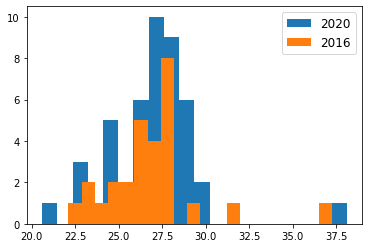

In [6]:
%matplotlib inline
num_bins=20
plt.hist(meanAgeSport2020, num_bins, label='2020')
plt.hist(meanAgeSport2016, num_bins, label='2016')
# Graphed in this order so that the 2016 would sit on top of 2020.
plt.legend(loc='upper right', fontsize='12');

## Part 2: Who are the 5 oldest athletes and who are the 5 youngest athletes in 2020?

In [7]:
olympics2020SortedByAgeNoDup = olympics2020.sort_values(by="Age", ascending = False).drop_duplicates(subset=['Name'])
olympics2016SortedByAgeNoDup = olympics2016.sort_values(by="age", ascending = False)
olympics2016Young5 = olympics2016SortedByAgeNoDup.loc[:,('name','sport','nationality','age')].tail(5)
olympics2016Old5 = olympics2016SortedByAgeNoDup.loc[:,('name','sport','nationality','age')].head(5)
olympics2020Young5 = olympics2020SortedByAgeNoDup.loc[:,('Name','Sport','Country','Age',)].tail(5)
olympics2020Old5 = olympics2020SortedByAgeNoDup.loc[:,('Name','Sport','Country','Age',)].head(5)
print("The five youngest athletes in the 2016 summer olympics are:\n", olympics2016Young5,'\n')
print("The five youngest athletes in the 2020 summer olympics are:\n", olympics2020Young5,'\n')
print("The five oldest athletes in the 2016 summer olympics are:\n", olympics2016Old5,'\n')
print("The five oldest athletes in the 2020 summer olympics are:\n", olympics2020Old5)

The five youngest athletes in the 2016 summer olympics are:
                     name     sport nationality  age
10433        Thint Myaat  aquatics         MYA   14
3305   Fatima Alkaramova  aquatics         AZE   14
231          Ajna Kesely  aquatics         HUN   14
654     Ana Iulia Dascal  aquatics         ROU   13
3598       Gaurika Singh  aquatics         NEP   13 

The five youngest athletes in the 2020 summer olympics are:
                  Name          Sport        Country  Age
7294      LEAL Rayssa  Skateboarding         Brazil   13
9549   NISHIYA Momiji  Skateboarding          Japan   13
1764        BROWN Sky  Skateboarding  Great Britain   13
5324    HIRAKI Kokona  Skateboarding          Japan   12
14944       ZAZA Hend   Table Tennis          Syria   12 

The five oldest athletes in the 2016 summer olympics are:
                  name       sport nationality  age
5299   Julie Brougham  equestrian         NZL   62
7092       Mary Hanna  equestrian         AUS   61
5045    

### Show the Age distribution of athletes in the 2016 and 2020 Summer Olympics.

<AxesSubplot:title={'center':'Age distribution of athletes in the 2016 Summer Olympics'}>

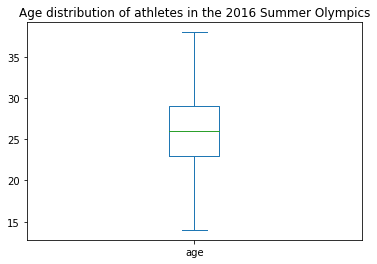

In [8]:
olympics2016AgeSorted = olympics2016SortedByAgeNoDup["age"]
olympics2016AgeSorted.plot.box(showfliers=False, title="Age distribution of athletes in the 2016 Summer Olympics")
#Outliers have been removed/filtered out

<AxesSubplot:title={'center':'Age distribution of athletes in the 2020 Summer Olympics'}>

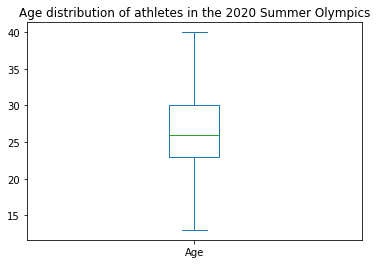

In [9]:
olympics2020AgeSorted = olympics2020SortedByAgeNoDup["Age"]
olympics2020AgeSorted.plot.box(showfliers=False, title="Age distribution of athletes in the 2020 Summer Olympics")
#Outliers have been removed/filtered out

### What country are these young and old compeditors from? 

In [10]:
print("Countries/Nationalities of the oldest and youngest compeditors from the 2016 and 2020 Olympic Games:\n")
print("2016 Youngest Athletes Countries:")
print(olympics2016Young5.loc[:,('name','nationality')],'\n')
print("2020 Youngest Athletes Countries:")
print(olympics2020Young5.loc[:,('Name','Country')],'\n')
print("2016 Oldest Athletes Countries:")
print(olympics2016Old5.loc[:,('name','nationality')],'\n')
print("2020 Oldest Athletes Countries:")
print(olympics2020Old5.loc[:,('Name','Country')])

Countries/Nationalities of the oldest and youngest compeditors from the 2016 and 2020 Olympic Games:

2016 Youngest Athletes Countries:
                    name nationality
10433        Thint Myaat         MYA
3305   Fatima Alkaramova         AZE
231          Ajna Kesely         HUN
654     Ana Iulia Dascal         ROU
3598       Gaurika Singh         NEP 

2020 Youngest Athletes Countries:
                 Name        Country
7294      LEAL Rayssa         Brazil
9549   NISHIYA Momiji          Japan
1764        BROWN Sky  Great Britain
5324    HIRAKI Kokona          Japan
14944       ZAZA Hend          Syria 

2016 Oldest Athletes Countries:
                 name nationality
5299   Julie Brougham         NZL
7092       Mary Hanna         AUS
5045    John Whitaker         GBR
10185   Suzanne Hearn         AUS
6982        Mark Todd         NZL 

2020 Oldest Athletes Countries:
                      Name    Country
4979            HANNA Mary  Australia
5506            HOY Andrew  Australi

MYA -> Myanmar<br>
AZE -> Azerbaijan<br>
HUN -> Hungary<br>
ROU -> Romania<br>
NEP -> Nepal<br>
NZL -> New Zealand<br>
AUS -> Australia<br>
GBR -> Great Britain

### What sport do they compete in?

In [11]:
print("Sports of the oldest and youngest compeditors from the 2016 and 2020 Olympic Games:\n")
print("2016 Youngest Athletes Sports:")
print(olympics2016Young5.loc[:,('name','sport')],'\n')
print("2020 Youngest Athletes Sports:")
print(olympics2020Young5.loc[:,('Name','Sport')],'\n')
print("2016 Oldest Athletes Sports:")
print(olympics2016Old5.loc[:,('name','sport')],'\n')
print("2020 Oldest Athletes Sports:")
print(olympics2020Old5.loc[:,('Name','Sport')])

Sports of the oldest and youngest compeditors from the 2016 and 2020 Olympic Games:

2016 Youngest Athletes Sports:
                    name     sport
10433        Thint Myaat  aquatics
3305   Fatima Alkaramova  aquatics
231          Ajna Kesely  aquatics
654     Ana Iulia Dascal  aquatics
3598       Gaurika Singh  aquatics 

2020 Youngest Athletes Sports:
                 Name          Sport
7294      LEAL Rayssa  Skateboarding
9549   NISHIYA Momiji  Skateboarding
1764        BROWN Sky  Skateboarding
5324    HIRAKI Kokona  Skateboarding
14944       ZAZA Hend   Table Tennis 

2016 Oldest Athletes Sports:
                 name       sport
5299   Julie Brougham  equestrian
7092       Mary Hanna  equestrian
5045    John Whitaker  equestrian
10185   Suzanne Hearn  equestrian
6982        Mark Todd  equestrian 

2020 Oldest Athletes Sports:
                      Name       Sport
4979            HANNA Mary  Equestrian
5506            HOY Andrew  Equestrian
10490         PINTO Carlos  Equestri

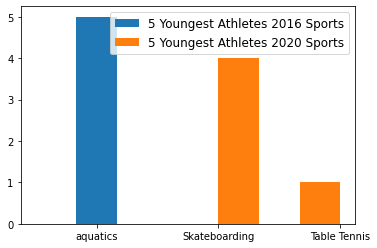

In [12]:
%matplotlib inline
num_bins=3
young2016Olympics = olympics2016Young5['sport']
young2020Olympics = olympics2020Young5['Sport']
plt.hist(young2016Olympics, num_bins, label="5 Youngest Athletes 2016 Sports")
plt.hist(young2020Olympics, num_bins, label="5 Youngest Athletes 2020 Sports")
plt.legend(loc='upper right', fontsize='12');

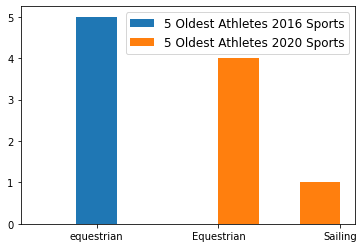

In [13]:
%matplotlib inline
num_bins=3
old2016Olympics = olympics2016Old5['sport']
old2020Olympics = olympics2020Old5['Sport']
plt.hist(old2016Olympics, num_bins, label="5 Oldest Athletes 2016 Sports")
plt.hist(old2020Olympics, num_bins, label="5 Oldest Athletes 2020 Sports")
plt.legend(loc='upper right', fontsize='12');

 ### What is the age distribution of their sport in 2016 and 2020? What conclusion can we draw from that?

Text(0, 0.5, 'Number of Athletes')

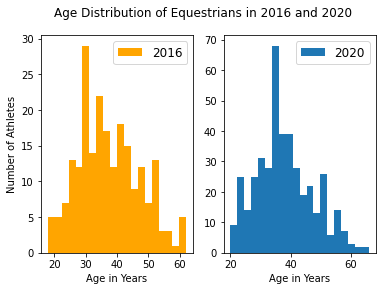

In [14]:
%matplotlib inline
num_bins=20
equestrianAge2020 = olympics2020[olympics2020['Sport'] == 'Equestrian']['Age']
equestrianAge2016 = olympics2016[olympics2016['sport'] == 'equestrian']['age']
plt.subplot(122)
plt.hist(equestrianAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.xlabel("Age in Years")
plt.subplot(121)
plt.hist(equestrianAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.suptitle("Age Distribution of Equestrians in 2016 and 2020")
plt.xlabel("Age in Years")
plt.ylabel("Number of Athletes")
# Lots of Equestrians among older athletes

Text(0, 0.5, 'Number of Athletes')

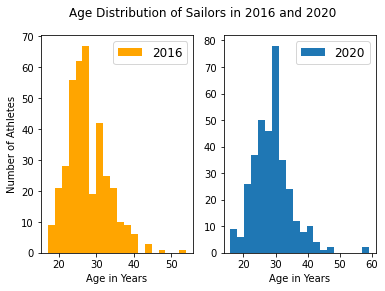

In [15]:
%matplotlib inline
num_bins=20
sailingAge2020 = olympics2020[olympics2020['Sport'] == 'Sailing']['Age']
sailingAge2016 = olympics2016[olympics2016['sport'] == 'sailing']['age']
plt.subplot(122)
plt.hist(sailingAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.xlabel("Age in Years")
plt.subplot(121)
plt.hist(sailingAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.suptitle("Age Distribution of Sailors in 2016 and 2020")
plt.xlabel("Age in Years")
plt.ylabel("Number of Athletes")
# A few sailors among older athletes

Text(0.5, 1.0, 'Age Distribution of Aquatic Athletes in 2016')

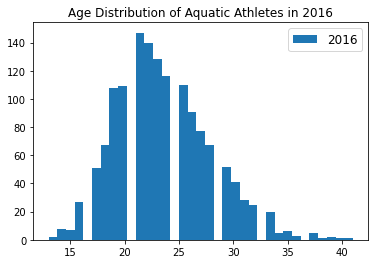

In [16]:
%matplotlib inline
num_bins=35
aquaticsAge2016 = olympics2016[olympics2016['sport'] == 'aquatics']['age']
plt.hist(aquaticsAge2016, num_bins, label="2016")
plt.legend(loc='upper right', fontsize='12');
plt.title("Age Distribution of Aquatic Athletes in 2016")
# A lot aquatics among younger athletes

Text(0.5, 1.0, 'Age Distribution of Skateboarders in 2020')

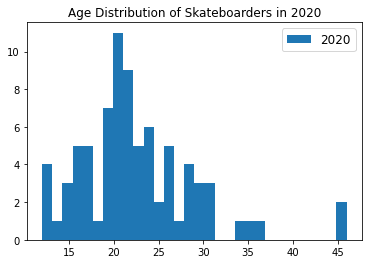

In [17]:
%matplotlib inline
num_bins=30
skateboardingAge2020 = olympics2020[olympics2020['Sport'] == 'Skateboarding']['Age']
plt.hist(skateboardingAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.title("Age Distribution of Skateboarders in 2020")
# A lot skateboarding among younger athletes

Text(0, 0.5, 'Number of Athletes')

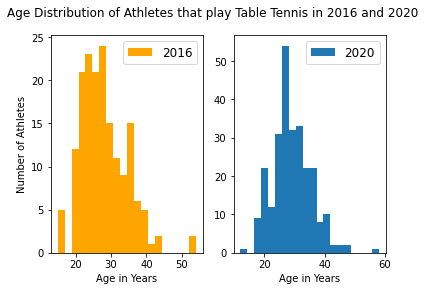

In [18]:
%matplotlib inline
num_bins=20
tableTennisAge2020 = olympics2020[olympics2020['Sport'] == 'Table Tennis']['Age']
tableTennisAge2016 = olympics2016[olympics2016['sport'] == 'table tennis']['age']
plt.subplot(122)
plt.hist(tableTennisAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.xlabel("Age in Years")
plt.subplot(121)
plt.hist(tableTennisAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.suptitle("Age Distribution of Athletes that play Table Tennis in 2016 and 2020")
plt.xlabel("Age in Years")
plt.ylabel("Number of Athletes")
# The young table tennis player seems to be an outlier, cool learning from data

### Do any of the older or younger athletes compete in the events that tend to have older or younger compeditors, respectively?

This builds off of the last question: //TODO

In [21]:
print("Sports of the oldest and youngest compeditors from the 2016 and 2020 Olympic Games:\n")
print("2016 Youngest Athletes Sports:")
print(olympics2016Young5.loc[:,('name','sport')],'\n')
print("2020 Youngest Athletes Sports:")
print(olympics2020Young5.loc[:,('Name','Sport')],'\n')
print("2016 Oldest Athletes Sports:")
print(olympics2016Old5.loc[:,('name','sport')],'\n')
print("2020 Oldest Athletes Sports:")
print(olympics2020Old5.loc[:,('Name','Sport')])

Sports of the oldest and youngest compeditors from the 2016 and 2020 Olympic Games:

2016 Youngest Athletes Sports:
                    name     sport
10433        Thint Myaat  aquatics
3305   Fatima Alkaramova  aquatics
231          Ajna Kesely  aquatics
654     Ana Iulia Dascal  aquatics
3598       Gaurika Singh  aquatics 

2020 Youngest Athletes Sports:
                 Name          Sport
7294      LEAL Rayssa  Skateboarding
9549   NISHIYA Momiji  Skateboarding
1764        BROWN Sky  Skateboarding
5324    HIRAKI Kokona  Skateboarding
14944       ZAZA Hend   Table Tennis 

2016 Oldest Athletes Sports:
                 name       sport
5299   Julie Brougham  equestrian
7092       Mary Hanna  equestrian
5045    John Whitaker  equestrian
10185   Suzanne Hearn  equestrian
6982        Mark Todd  equestrian 

2020 Oldest Athletes Sports:
                      Name       Sport
4979            HANNA Mary  Equestrian
5506            HOY Andrew  Equestrian
10490         PINTO Carlos  Equestri

### Did any of these athletes compete in 2016 and 2020?

In [19]:
print(olympics2016Old5["name"])
print(olympics2020Old5["Name"])

5299     Julie Brougham
7092         Mary Hanna
5045      John Whitaker
10185     Suzanne Hearn
6982          Mark Todd
Name: name, dtype: object
4979              HANNA Mary
5506              HOY Andrew
10490           PINTO Carlos
4817          GULLIKSEN Geir
7198     LANGE Santiago Raul
Name: Name, dtype: object


Through visual inspection, we can see that one older athlete competed in both the 2016 and 2020 Summer Olympic Games.

In [20]:
print(olympics2016Young5["name"])
print(olympics2020Young5["Name"])

10433          Thint Myaat
3305     Fatima Alkaramova
231            Ajna Kesely
654       Ana Iulia Dascal
3598         Gaurika Singh
Name: name, dtype: object
7294        LEAL Rayssa
9549     NISHIYA Momiji
1764          BROWN Sky
5324      HIRAKI Kokona
14944         ZAZA Hend
Name: Name, dtype: object


Through visual inspection, we can see that none of the younger athletes competed in both the 2016 and 2020 Summer Olympic Games.

We cannot use numpy or pandas to check if the any of the athletes competed in both 2016 and 2020 as the names are formatted differently in the 2 datasets.